Homework 3 – Gradient Descent and its variants


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(5)

In [3]:
df = pd.read_excel('/content/Concrete_Data.xls')
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


input is normalized or not:

In [5]:
def normalise_ornot(df, n_state = 'Y'):
  if n_state == 'Y':
    y = df.iloc[:,-1].values
    x = df.iloc[:,:-1]
    y=np.array((y-y.mean())/y.std())
    x=x.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
  elif n_state == 'N':
    x = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values
  return x, y



In [6]:
x, y = normalise_ornot(df, n_state = 'N')

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 21, stratify= None)

In [8]:
x_train

array([[ 190.34,    0.  ,  125.18, ..., 1079.  ,  798.9 ,  100.  ],
       [ 289.  ,    0.  ,    0.  , ...,  913.2 ,  895.3 ,   90.  ],
       [ 194.68,    0.  ,  100.52, ...,  998.  ,  901.8 ,   14.  ],
       ...,
       [ 237.5 ,  237.5 ,    0.  , ...,  932.  ,  594.  ,    7.  ],
       [ 382.  ,    0.  ,    0.  , ..., 1047.  ,  739.  ,    7.  ],
       [ 266.2 ,  112.3 ,   87.5 , ...,  909.7 ,  744.5 ,   28.  ]])

In [9]:
#x = df.iloc[:,:-1].values
x

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [10]:
#y = df.iloc[:,-1].values
y

array([79.98611076, 61.88736576, 40.26953526, ..., 23.69660064,
       32.76803638, 32.40123514])

the steps to implement gradient descent:
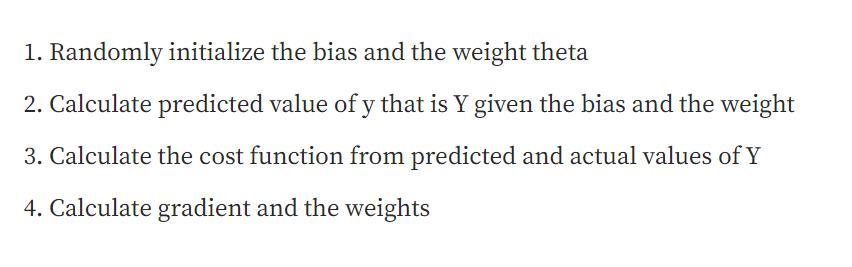

In [11]:
#random initialize:

def initialize(nums):
  b = np.random.random()
  w = np.random.randn(nums)
  return b,w

In [12]:
b,w = initialize(8)
print(b,w)

0.22199317108973948 [-0.2939598   0.37159057 -0.02330375  0.84177767  1.36758552  0.57470769
 -1.88576241  0.17092537]


In [13]:
# calculating value of y with weights and bias

def cal_y(w, b, x):
  y = b + np.dot(x,w)
  return y

In [14]:
Y_hat = cal_y(w, b, x)
Y_hat

array([-691.02283707, -682.40222176, -391.00813319, ..., -776.84889836,
       -728.06250308, -794.71748246])

In [15]:
def predict_Y(b,theta,X):
  return b + np.dot(X,theta)


In [16]:
Y_hat=predict_Y(b,w,x)
Y_hat[0:10]

array([-691.02283707, -682.40222176, -391.00813319, -374.77022318,
       -780.20825376, -556.13464679, -406.38386587, -463.98571507,
       -566.73201964, -527.21300046])

In [17]:
import math
def get_cost(Y,Y_hat):
  Y_resd=Y-Y_hat
  return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)


In [18]:
Y_hat=cal_y(w,b,x)
get_cost(y,Y_hat)

708965.358621293

In [19]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1


In [20]:
print("After initialization -Bias: ",b,"theta: ",w)
Y_hat=predict_Y(b,w,x)
b,theta=update_theta(x,y,Y_hat,b,w,0.0001)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(y,Y_hat)

After initialization -Bias:  0.22199317108973948 theta:  [-0.2939598   0.37159057 -0.02330375  0.84177767  1.36758552  0.57470769
 -1.88576241  0.17092537]
After first update -Bias:  0.38650651274447034 theta:  [ 46.34374553  11.31416567   9.06375132  30.34168594   2.45898708
 159.65073392 128.04788728   7.32350401]


708965.358621293

In [21]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
      Y_hat=predict_Y(b,theta,X)
      this_cost=get_cost(Y,Y_hat)
      prev_b=b
      prev_theta=theta
      b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
      if(iter_num%10==0):
        gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
        result_idx=result_idx+1
      iter_num +=1
      print('Final Estimate of b and theta : ',b,theta)
    return gd_iterations_df,b,theta


In [22]:
gd_iterations_df,b,theta=run_gradient_descent(x,y,alpha=0.0001,num_iterations=110)

Final Estimate of b and theta :  0.35652195914157325 [ 46.17453383  11.89817477   8.93902354  30.20403986   0.76855244
 163.5634874  131.04723374   7.19926183]
Final Estimate of b and theta :  -55.77101832338142 [-15746.68837251  -4014.82930696  -3017.02180587 -10132.03514377
   -346.37736648 -54597.76363421 -43393.12325864  -2545.74275452]
Final Estimate of b and theta :  18650.807635914316 [ 5248707.39394326  1338010.85628434  1005268.25901343  3376843.39071544
   115350.03314184 18196700.96436764 14462068.34098873   848536.0597613 ]
Final Estimate of b and theta :  -6215981.6593987625 [-1.74931923e+09 -4.45939522e+08 -3.35041142e+08 -1.12545318e+09
 -3.84445809e+07 -6.06469761e+09 -4.81999821e+09 -2.82804907e+08]
Final Estimate of b and theta :  2071696974.7121801 [5.83022836e+11 1.48625202e+11 1.11664373e+11 3.75097292e+11
 1.28130235e+10 2.02127612e+12 1.60643579e+12 9.42547914e+10]
Final Estimate of b and theta :  -690466680722.8737 [-1.94313091e+14 -4.95346332e+13 -3.72161229e+1

In [23]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,7.413712e+05
1,10.0,2.032388e+56
2,20.0,5.812147e+106
3,30.0,1.662136e+157
4,40.0,4.753312e+207
5,50.0,1.359334e+258
6,60.0,inf
7,70.0,inf
8,80.0,inf
9,90.0,inf


Text(0, 0.5, 'Cost or MSE')

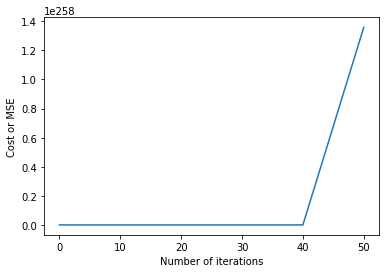

In [24]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

Final Estimate of b and theta :  0.6479597994139169 [ 6.82923602  2.66989911  0.34294013  2.48238845 -0.70187203 17.69546803
 14.73188348  0.65444505]
Final Estimate of b and theta :  0.024167306764716456 [-169.01586546  -42.22730132  -33.10513372 -110.45725987   -4.56270388
 -590.78140778 -468.91809212  -27.71283028]
Final Estimate of b and theta :  20.251125860525853 [ 5523.08766183  1408.74176304  1057.26556991  3551.79949966
   120.53422952 19144.00739701 15215.50826615   892.55854203]
Final Estimate of b and theta :  -635.6813632210147 [-179071.4641768   -45648.49444017  -34297.35561895 -115210.01385628
   -3936.27705414 -620824.33603809 -493407.80765219  -28950.00045876]
Final Estimate of b and theta :  20635.260729479043 [ 5807057.23436713  1480345.84492021  1112205.55101734  3736064.03050497
   127620.16139848 20132426.76614424 16000511.47191042   938801.6915433 ]
Final Estimate of b and theta :  -669150.671336984 [-1.88314455e+08 -4.80054500e+07 -3.60672250e+07 -1.21155191e+08

<ipython-input-19-fddd6afa3dbd>:3: RuntimeWarning: overflow encountered in multiply
  dw=(np.dot((y_hat-y),x)*2)/len(y)
<ipython-input-19-fddd6afa3dbd>:5: RuntimeWarning: invalid value encountered in subtract
  theta_1=theta_o-learning_rate*dw


 -2.679541284397144e+29 [-7.54084105e+31 -1.92232440e+31 -1.44427154e+31 -4.85152361e+31
 -1.65724166e+30 -2.61432675e+32 -2.07777058e+32 -1.21909530e+31]
Final Estimate of b and theta :  8.93052410294711e+31 [2.51325341e+34 6.40682959e+33 4.81354846e+33 1.61694275e+34
 5.52334711e+32 8.71317348e+34 6.92490925e+34 4.06306857e+33]
Final Estimate of b and theta :  -2.9764147026853074e+34 [-8.37631064e+36 -2.13530377e+36 -1.60428618e+36 -5.38903666e+36
 -1.84085182e+35 -2.90397488e+37 -2.30797224e+37 -1.35416207e+36]
Final Estimate of b and theta :  9.919960329582156e+36 [2.79170336e+39 7.11665907e+38 5.34685414e+38 1.79608809e+39
 6.13529325e+37 9.67852886e+39 7.69213813e+39 4.51322661e+38]
Final Estimate of b and theta :  -3.306179506898103e+39 [-9.30434410e+41 -2.37187968e+41 -1.78202926e+41 -5.98610219e+41
 -2.04480463e+40 -3.22571388e+42 -2.56367855e+42 -1.50419325e+41]
Final Estimate of b and theta :  1.1019018795101782e+42 [3.10100351e+44 7.90513242e+43 5.93924616e+43 1.99508140e+4

Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

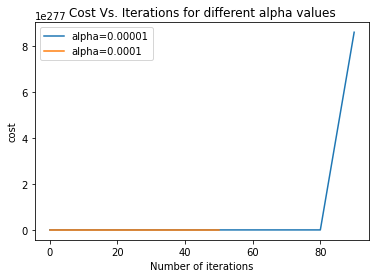

In [25]:
alpha_df_1,b,theta=run_gradient_descent(x,y,alpha=0.00001,num_iterations=200)
alpha_df_2,b,theta=run_gradient_descent(x,y,alpha=0.0001,num_iterations=200)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label='alpha=0.00001')
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label='alpha=0.0001')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

with input normalization


In [26]:
x

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [27]:
y

array([79.98611076, 61.88736576, 40.26953526, ..., 23.69660064,
       32.76803638, 32.40123514])

In [28]:
#Y=np.array((y-y.mean())/y.std())
#X=df.iloc[:,:-1].apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [29]:
x, y = normalise_ornot(df, n_state = 'Y')
x = x.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 21, stratify= None)

In [30]:
x

array([[ 2.47671465, -0.85647025, -0.84672071, ...,  0.86274101,
        -1.21706721, -0.27959729],
       [ 2.47671465, -0.85647025, -0.84672071, ...,  1.05565758,
        -1.21706721, -0.27959729],
       [ 0.49120441,  0.79514635, -0.84672071, ..., -0.5262583 ,
        -2.23982446,  3.55134048],
       ...,
       [-1.26944082,  0.75921645,  0.85024791, ..., -1.03555805,
         0.08008834, -0.27959729],
       [-1.16801234,  1.30743726, -0.84672071, ...,  0.21454133,
         0.19109492, -0.27959729],
       [-0.19391623,  0.30835409,  0.37678429, ..., -1.39438287,
        -0.15065568, -0.27959729]])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 21, stratify= None)

In [32]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
      Y_hat=predict_Y(b,theta,X)
      this_cost=get_cost(Y,Y_hat)
      prev_b=b
      prev_theta=theta
      b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
      if(iter_num%10==0):
        gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
        result_idx=result_idx+1
      iter_num +=1
      print('Final Estimate of b and theta : ',b,theta)
    return gd_iterations_df,b,theta
gd_iterations_df,b,theta=run_gradient_descent(x_train,y_train,alpha=0.01,num_iterations=11000)

Streaming output truncated to the last 5000 lines.
Final Estimate of b and theta :  -0.0005873001901738209 [ 0.70997136  0.50988601  0.29637517 -0.1907918   0.13301497  0.06402329
  0.07726363  0.41479802]
Final Estimate of b and theta :  -0.0005873016037636124 [ 0.70997171  0.50988636  0.29637548 -0.19079149  0.13301502  0.06402357
  0.07726397  0.41479804]
Final Estimate of b and theta :  -0.000587303016508951 [ 0.70997207  0.50988671  0.29637579 -0.19079118  0.13301506  0.06402384
  0.07726432  0.41479805]
Final Estimate of b and theta :  -0.0005873044284103432 [ 0.70997243  0.50988706  0.29637609 -0.19079087  0.1330151   0.06402412
  0.07726466  0.41479806]
Final Estimate of b and theta :  -0.0005873058394682916 [ 0.70997279  0.50988741  0.2963764  -0.19079056  0.13301514  0.06402439
  0.077265    0.41479808]
Final Estimate of b and theta :  -0.0005873072496833004 [ 0.70997315  0.50988776  0.29637671 -0.19079025  0.13301518  0.06402467
  0.07726535  0.41479809]
Final Estimate of b 

In [33]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,6.368231
1,10.0,3.448954
2,20.0,2.086814
3,30.0,1.404591
4,40.0,1.036094
5,50.0,0.822563
6,60.0,0.691452
7,70.0,0.607340
8,80.0,0.551628
9,90.0,0.513835


Text(0, 0.5, 'Cost or MSE')

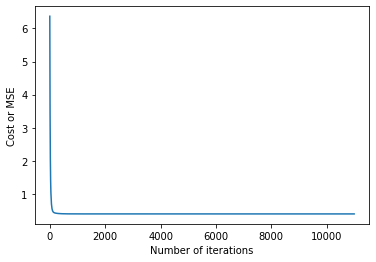

In [34]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

Streaming output truncated to the last 5000 lines.
Final Estimate of b and theta :  0.030741586148946513 [ 0.18110975 -0.04634724 -0.15226116 -0.6933904  -0.04012121 -0.43004848
 -0.42189195  0.34144189]
Final Estimate of b and theta :  0.030735791089150272 [ 0.18111208 -0.04633916 -0.15225826 -0.6933915  -0.04011229 -0.43003875
 -0.42189617  0.3414508 ]
Final Estimate of b and theta :  0.030729997162649274 [ 0.1811144  -0.04633108 -0.15225536 -0.6933926  -0.04010338 -0.43002902
 -0.4219004   0.34145971]
Final Estimate of b and theta :  0.030724204369220895 [ 0.18111673 -0.046323   -0.15225246 -0.69339369 -0.04009446 -0.43001929
 -0.42190462  0.34146862]
Final Estimate of b and theta :  0.030718412708642555 [ 0.18111906 -0.04631493 -0.15224956 -0.69339478 -0.04008555 -0.43000957
 -0.42190884  0.34147753]
Final Estimate of b and theta :  0.030712622180691717 [ 0.18112139 -0.04630685 -0.15224666 -0.69339588 -0.04007663 -0.42999984
 -0.42191306  0.34148643]
Final Estimate of b and theta :

Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

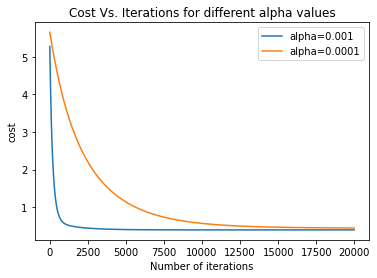

In [35]:
alpha_df_1,b,theta=run_gradient_descent(x_train,y_train,alpha=0.001,num_iterations=20000)
alpha_df_2,b,theta=run_gradient_descent(x_train,y_train,alpha=0.0001,num_iterations=20000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label='alpha=0.001')
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label='alpha=0.0001')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

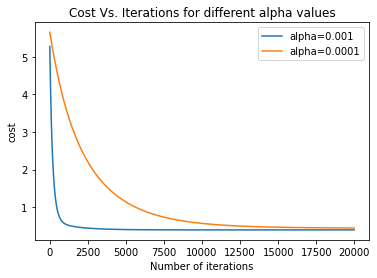

In [36]:
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label='alpha=0.001')
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label='alpha=0.0001')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

using pytorch


In [37]:
import torch

In [38]:
x,y = normalise_ornot(df, 'N')    #not normalized

In [39]:
x = torch.from_numpy(x)
y = torch.from_numpy(y)

In [40]:
from torch.utils.data import TensorDataset
dataset = TensorDataset(x,y)
from torch.utils.data import DataLoader
batch_size = 3
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [41]:
w = torch.randn(3, 8, requires_grad=True)
b = torch.randn(3, requires_grad=True)
print(w)
print(b)

tensor([[ 0.9341, -0.8101,  0.1234,  0.8194, -0.3873,  0.8600,  1.4219, -1.0991],
        [ 0.5105,  1.3321,  0.0432, -0.6363, -0.9911,  0.5735,  1.3427,  0.0057],
        [-1.1330,  1.7277, -0.4709, -0.1278,  0.7153,  0.5319,  0.5693,  0.0547]],
       requires_grad=True)
tensor([ 0.9743, -0.4341,  0.1669], requires_grad=True)


In [42]:
def model(X):
    return X.float() @ w.t() + b

In [43]:
def mse_loss(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference)/ difference.numel()

In [44]:
epochs = 50
for i in range(epochs):
    # Iterate through training dataloader
    for x,y in train_loader:
        # Generate Prediction
        preds = model(x)
        # Get the loss and perform backpropagation
        loss = mse_loss(preds, y.view(1,-1))
        loss.backward()
        # Let's update the weights
        with torch.no_grad():
            w -= w.grad *1e-6
            b -= b.grad * 1e-6
            # Set the gradients to zero
            w.grad.zero_()
            b.grad.zero_()
    print(f"Epoch {i}/{epochs}: Loss: {loss}")

Epoch 0/50: Loss: 780.412363242907
Epoch 1/50: Loss: 1793.9153600162128
Epoch 2/50: Loss: 75.64348326331334
Epoch 3/50: Loss: 415.73244936948527
Epoch 4/50: Loss: 176.1327664541645
Epoch 5/50: Loss: 565.1441988903265
Epoch 6/50: Loss: 306.8063229497778
Epoch 7/50: Loss: 251.8931187313743
Epoch 8/50: Loss: 763.2930564335969
Epoch 9/50: Loss: 337.06986886305737
Epoch 10/50: Loss: 184.32366913246412
Epoch 11/50: Loss: 646.0737816763142
Epoch 12/50: Loss: 1376.055115723829
Epoch 13/50: Loss: 509.4678004808604
Epoch 14/50: Loss: 731.1726165802147
Epoch 15/50: Loss: 815.0263958398542
Epoch 16/50: Loss: 821.2059942105298
Epoch 17/50: Loss: 96.896274591634
Epoch 18/50: Loss: 1086.1462876844544
Epoch 19/50: Loss: 544.6923620508576
Epoch 20/50: Loss: 106.59508394360462
Epoch 21/50: Loss: 319.5897797292855
Epoch 22/50: Loss: 1684.9878130595607
Epoch 23/50: Loss: 327.5083916225113
Epoch 24/50: Loss: 62.42879275129494
Epoch 25/50: Loss: 752.5797361283776
Epoch 26/50: Loss: 191.59328290619803
Epoch 

with normalization


https://www.analyticsvidhya.com/blog/2021/08/linear-regression-and-gradient-descent-in-pytorch/

In [45]:
x,y = normalise_ornot(df, 'Y') 

In [46]:
x = x.to_numpy()
x

array([[ 2.47671465, -0.85647025, -0.84672071, ...,  0.86274101,
        -1.21706721, -0.27959729],
       [ 2.47671465, -0.85647025, -0.84672071, ...,  1.05565758,
        -1.21706721, -0.27959729],
       [ 0.49120441,  0.79514635, -0.84672071, ..., -0.5262583 ,
        -2.23982446,  3.55134048],
       ...,
       [-1.26944082,  0.75921645,  0.85024791, ..., -1.03555805,
         0.08008834, -0.27959729],
       [-1.16801234,  1.30743726, -0.84672071, ...,  0.21454133,
         0.19109492, -0.27959729],
       [-0.19391623,  0.30835409,  0.37678429, ..., -1.39438287,
        -0.15065568, -0.27959729]])

In [47]:
x = torch.from_numpy(x)
y = torch.from_numpy(y)

In [48]:
x

tensor([[ 2.4767, -0.8565, -0.8467,  ...,  0.8627, -1.2171, -0.2796],
        [ 2.4767, -0.8565, -0.8467,  ...,  1.0557, -1.2171, -0.2796],
        [ 0.4912,  0.7951, -0.8467,  ..., -0.5263, -2.2398,  3.5513],
        ...,
        [-1.2694,  0.7592,  0.8502,  ..., -1.0356,  0.0801, -0.2796],
        [-1.1680,  1.3074, -0.8467,  ...,  0.2145,  0.1911, -0.2796],
        [-0.1939,  0.3084,  0.3768,  ..., -1.3944, -0.1507, -0.2796]],
       dtype=torch.float64)

In [49]:
from torch.utils.data import TensorDataset
dataset = TensorDataset(x,y)
dataset

In [50]:
dataset[:3]

(tensor([[ 2.4767, -0.8565, -0.8467, -0.9162, -0.6199,  0.8627, -1.2171, -0.2796],
         [ 2.4767, -0.8565, -0.8467, -0.9162, -0.6199,  1.0557, -1.2171, -0.2796],
         [ 0.4912,  0.7951, -0.8467,  2.1743, -1.0384, -0.5263, -2.2398,  3.5513]],
        dtype=torch.float64),
 tensor([2.6452, 1.5613, 0.2666], dtype=torch.float64))

In [51]:
from torch.utils.data import DataLoader

batch_size = 3

train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [52]:
w_t = torch.randn(3, 8, requires_grad=True)
b_t = torch.randn(3, requires_grad=True)
print(w_t)
print(b_t)

tensor([[-0.2070, -1.6545, -0.2638, -0.3053,  0.1615,  0.9166, -0.6744, -0.2050],
        [-0.6561,  0.4875, -0.0087, -0.3866, -0.0973,  1.0939, -0.7071, -0.5009],
        [ 1.2292, -0.5460, -0.0743, -0.4573,  1.4925, -1.2681,  0.5106,  1.1768]],
       requires_grad=True)
tensor([ 0.9353,  0.2701, -0.5980], requires_grad=True)


In [53]:
def model(X):
    return X.float() @ w_t.t() + b_t

In [54]:
model(x)

tensor([[ 3.9116,  0.5939,  0.4260],
        [ 4.0884,  0.8050,  0.1814],
        [-0.7898, -1.1675,  0.7932],
        ...,
        [-1.3902,  0.2165, -1.8752],
        [-0.4145,  1.9459, -1.7869],
        [-0.9606, -1.1179,  0.5208]], grad_fn=<AddBackward0>)

numel() method returns the number of elements in the tensor.

In [55]:
def mse_loss(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference)/ difference.numel()

Epoch 0/100: Loss: 16.159393739988435
Epoch 1/100: Loss: 1.3476203178124992
Epoch 2/100: Loss: 3.7217955260729156
Epoch 3/100: Loss: 7.194766714456755
Epoch 4/100: Loss: 1.5209023047111738
Epoch 5/100: Loss: 2.5983613187678922
Epoch 6/100: Loss: 0.8976294507119632
Epoch 7/100: Loss: 5.758066389241914
Epoch 8/100: Loss: 7.019393064801203
Epoch 9/100: Loss: 2.7378574243609832
Epoch 10/100: Loss: 2.3480751145375813
Epoch 11/100: Loss: 8.102165251374782
Epoch 12/100: Loss: 2.2308156322258794
Epoch 13/100: Loss: 8.83302636416371
Epoch 14/100: Loss: 5.148266824210837
Epoch 15/100: Loss: 3.0956630441475608
Epoch 16/100: Loss: 4.964199772105316
Epoch 17/100: Loss: 5.305642384970549
Epoch 18/100: Loss: 10.055756140608699
Epoch 19/100: Loss: 7.714486125977601
Epoch 20/100: Loss: 0.3382077851201503
Epoch 21/100: Loss: 2.901754956488134
Epoch 22/100: Loss: 6.285544587932905
Epoch 23/100: Loss: 5.98911748191991
Epoch 24/100: Loss: 12.252429959231812
Epoch 25/100: Loss: 1.4292908000838283
Epoch 26/1

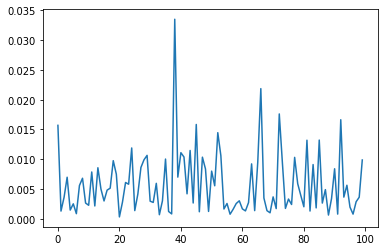

In [56]:
epochs = 100
loss_va = []
current_value = 0.0
for i in range(epochs):
    # Iterate through training dataloader
    for x,y in train_loader:
        # Generate Prediction
        preds = model(x)
        # Get the loss and perform backpropagation
        loss = mse_loss(preds, y.view(1,-1))
        loss.backward()
        # Let's update the weights
        with torch.no_grad():
            w_t -= w_t.grad *1e-6
            b_t -= b_t.grad * 1e-6
            # Set the gradients to zero
            w_t.grad.zero_()
            b_t.grad.zero_()
        current_value = loss.item()
    loss_va.append(current_value)
    print(f"Epoch {i}/{epochs}: Loss: {loss}")
plt.plot(loss_va)

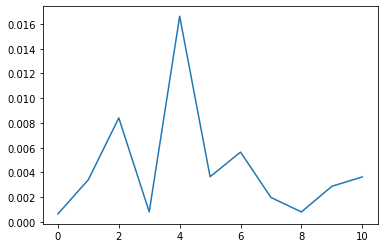

In [102]:
plt.plot(loss_va[-12:-1])

In [57]:
for x,y in train_loader:
    preds = model(x)
    print("Prediction is :n",preds)
    print("nActual targets is :n",y)
    break

Prediction is :n tensor([[-2.5575,  2.4948, -4.6819],
        [ 3.6632,  2.2993, -2.7315],
        [ 0.0081, -2.3910, -0.4288]], grad_fn=<AddBackward0>)
nActual targets is :n tensor([ 0.9610, -0.8836, -1.5329], dtype=torch.float64)


sgd from sctrach

stocastic pytorch

with momentum

In [58]:
x, y = normalise_ornot(df, n_state = 'Y')
x = x.to_numpy()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 21, stratify= None)

In [59]:
def compute_gradients(x,y,y_hat,b_0, theta_o,lr, gama,vt):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    #vt = np.zeros(1)
    vt = gama * vt + lr * db
    b_1 = b_0 - vt

    vt = np.zeros(theta_o.shape[0])
    vt = gama * vt + lr * dw
    theta_1 = theta_o - vt
    return b_1,theta_1

In [60]:
b,theta=initialize(x_train.shape[1])

In [61]:
Y_hat=predict_Y(b,theta,x_train)

In [62]:
def run_gradient_descent_momentum(X,Y,alpha, num_iterations, gama):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    vt = np.zeros(1)
    for each_iter in range(num_iterations):
      Y_hat=predict_Y(b,theta,X)   #predict
      this_cost=get_cost(Y,Y_hat)   #mse _loss  
      prev_b=b
      prev_theta=theta
      #b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)   #update w and b
      b, theta = compute_gradients(X,Y,Y_hat,prev_b,prev_theta,alpha, gama,vt)
      if(iter_num%10==0):
        gd_iterations_df.loc[result_idx]=[iter_num,this_cost]    #adding each cost with iteration in a dataframe
        result_idx=result_idx+1
      iter_num +=1
      print('Final Estimate of b and theta : ',b,theta)
    return gd_iterations_df,b,theta,this_cost
gd_iterations_df,b,theta, mse_loss= run_gradient_descent_momentum(x_train,y_train,alpha=0.0001,num_iterations=10000,gama = 0.9)

Streaming output truncated to the last 5000 lines.
Final Estimate of b and theta :  [0.12408174] [ 0.56348213  0.57229448  0.03993255 -0.19726327  0.13299773  0.32491685
  0.35254231  0.33252765]
Final Estimate of b and theta :  [0.12405859] [ 0.56351231  0.57228829  0.03996618 -0.19723966  0.1330175   0.32487358
  0.3524962   0.33254726]
Final Estimate of b and theta :  [0.12403544] [ 0.56354248  0.5722821   0.0399998  -0.19721606  0.13303727  0.32483033
  0.3524501   0.33256687]
Final Estimate of b and theta :  [0.1240123] [ 0.56357265  0.57227591  0.04003342 -0.19719246  0.13305704  0.32478708
  0.352404    0.33258647]
Final Estimate of b and theta :  [0.12398917] [ 0.56360281  0.57226972  0.04006704 -0.19716887  0.1330768   0.32474384
  0.35235792  0.33260607]
Final Estimate of b and theta :  [0.12396604] [ 0.56363297  0.57226353  0.04010065 -0.19714529  0.13309656  0.32470061
  0.35231185  0.33262566]
Final Estimate of b and theta :  [0.12394291] [ 0.56366311  0.57225734  0.040134

In [63]:
gd_iterations_df

,iteration,cost
0,0.0,7.054126
1,10.0,7.012744
2,20.0,6.971663
3,30.0,6.930880
4,40.0,6.890393
...,...,...
995,9950.0,0.478723
996,9960.0,0.478419
997,9970.0,0.478115
998,9980.0,0.477812


Text(0, 0.5, 'Cost or MSE')

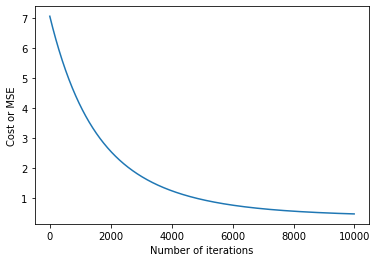

In [64]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

Streaming output truncated to the last 5000 lines.
Final Estimate of b and theta :  [0.70037823] [-0.05376116 -0.0300389  -0.25294037 -0.16428139 -0.37028815  0.33950904
  0.43066828 -0.39092557]
Final Estimate of b and theta :  [0.7003643] [-0.05374909 -0.03003258 -0.25293917 -0.16428211 -0.37027584  0.33949723
  0.430657   -0.3909113 ]
Final Estimate of b and theta :  [0.70035038] [-0.05373701 -0.03002625 -0.25293796 -0.16428283 -0.37026353  0.33948542
  0.43064573 -0.39089703]
Final Estimate of b and theta :  [0.70033645] [-0.05372493 -0.03001993 -0.25293676 -0.16428355 -0.37025123  0.33947361
  0.43063445 -0.39088276]
Final Estimate of b and theta :  [0.70032253] [-0.05371285 -0.03001361 -0.25293556 -0.16428427 -0.37023892  0.3394618
  0.43062317 -0.3908685 ]
Final Estimate of b and theta :  [0.7003086] [-0.05370077 -0.03000729 -0.25293435 -0.16428499 -0.37022662  0.33944999
  0.43061189 -0.39085423]
Final Estimate of b and theta :  [0.70029468] [-0.0536887  -0.03000097 -0.25293315

Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

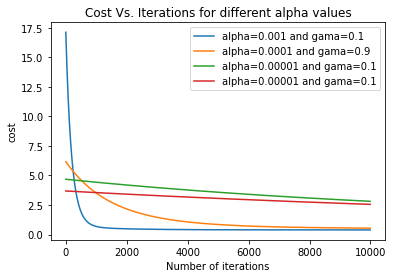

In [65]:
alpha_dfm_1,b,theta, mse_loss1=run_gradient_descent_momentum(x_train,y_train,alpha=0.001,num_iterations=10000, gama = 0.1)
alpha_dfm_2,b,theta, mse_loss2=run_gradient_descent_momentum(x_train,y_train,alpha=0.0001,num_iterations=10000, gama= 0.9)
alpha_dfm_3,b,theta, mse_loss1=run_gradient_descent_momentum(x_train,y_train,alpha=0.00001,num_iterations=10000, gama = 0.1)
alpha_dfm_4,b,theta, mse_loss2=run_gradient_descent_momentum(x_train,y_train,alpha=0.00001,num_iterations=10000, gama= 0.9)
plt.plot(alpha_dfm_1['iteration'],alpha_dfm_1['cost'],label='alpha=0.001 and gama=0.1')
plt.plot(alpha_dfm_2['iteration'],alpha_dfm_2['cost'],label='alpha=0.0001 and gama=0.9')
plt.plot(alpha_dfm_3['iteration'],alpha_dfm_3['cost'],label='alpha=0.00001 and gama=0.1')
plt.plot(alpha_dfm_4['iteration'],alpha_dfm_4['cost'],label='alpha=0.00001 and gama=0.1')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

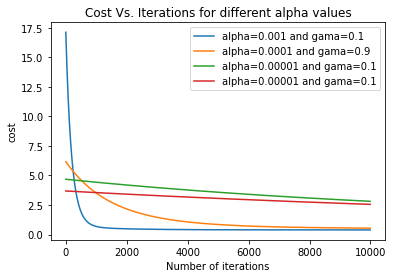

In [66]:
plt.plot(alpha_dfm_1['iteration'],alpha_dfm_1['cost'],label='alpha=0.001 and gama=0.1')
plt.plot(alpha_dfm_2['iteration'],alpha_dfm_2['cost'],label='alpha=0.0001 and gama=0.9')
plt.plot(alpha_dfm_3['iteration'],alpha_dfm_3['cost'],label='alpha=0.00001 and gama=0.1')
plt.plot(alpha_dfm_4['iteration'],alpha_dfm_4['cost'],label='alpha=0.00001 and gama=0.1')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

gd with momentum with pytorch

In [103]:
x,y = normalise_ornot(df, 'Y')
x = x.to_numpy()
x = torch.from_numpy(x)
y = torch.from_numpy(y)
from torch.utils.data import TensorDataset
dataset = TensorDataset(x,y)
#dataset
from torch.utils.data import DataLoader

batch_size = 3

train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
w_t = torch.randn(3, 8, requires_grad=True)
b_t = torch.randn(3, requires_grad=True)
print(w_t)
print(b_t)

tensor([[-0.7539,  1.8303,  0.9593,  0.9303,  0.9186, -0.5259, -0.5630, -0.6351],
        [ 2.1766,  1.1156, -0.0717,  0.4835, -0.2611,  0.9134,  1.1039, -0.2344],
        [ 1.1762,  0.1001, -0.7919,  0.4799, -1.4656, -1.9469, -1.1255, -0.1417]],
       requires_grad=True)
tensor([ 1.8384,  0.3296, -1.0446], requires_grad=True)


In [104]:
import torch.nn as nn

In [105]:
x

tensor([[ 2.4767, -0.8565, -0.8467,  ...,  0.8627, -1.2171, -0.2796],
        [ 2.4767, -0.8565, -0.8467,  ...,  1.0557, -1.2171, -0.2796],
        [ 0.4912,  0.7951, -0.8467,  ..., -0.5263, -2.2398,  3.5513],
        ...,
        [-1.2694,  0.7592,  0.8502,  ..., -1.0356,  0.0801, -0.2796],
        [-1.1680,  1.3074, -0.8467,  ...,  0.2145,  0.1911, -0.2796],
        [-0.1939,  0.3084,  0.3768,  ..., -1.3944, -0.1507, -0.2796]],
       dtype=torch.float64)

In [106]:
#x=torch.tensor(x)
x

tensor([[ 2.4767, -0.8565, -0.8467,  ...,  0.8627, -1.2171, -0.2796],
        [ 2.4767, -0.8565, -0.8467,  ...,  1.0557, -1.2171, -0.2796],
        [ 0.4912,  0.7951, -0.8467,  ..., -0.5263, -2.2398,  3.5513],
        ...,
        [-1.2694,  0.7592,  0.8502,  ..., -1.0356,  0.0801, -0.2796],
        [-1.1680,  1.3074, -0.8467,  ...,  0.2145,  0.1911, -0.2796],
        [-0.1939,  0.3084,  0.3768,  ..., -1.3944, -0.1507, -0.2796]],
       dtype=torch.float64)

In [107]:
x = x.to(torch.float32)
x

tensor([[ 2.4767, -0.8565, -0.8467,  ...,  0.8627, -1.2171, -0.2796],
        [ 2.4767, -0.8565, -0.8467,  ...,  1.0557, -1.2171, -0.2796],
        [ 0.4912,  0.7951, -0.8467,  ..., -0.5263, -2.2398,  3.5513],
        ...,
        [-1.2694,  0.7592,  0.8502,  ..., -1.0356,  0.0801, -0.2796],
        [-1.1680,  1.3074, -0.8467,  ...,  0.2145,  0.1911, -0.2796],
        [-0.1939,  0.3084,  0.3768,  ..., -1.3944, -0.1507, -0.2796]])

In [108]:
# Define model
model = nn.Linear(3, 8)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.5194, -0.2500,  0.5294],
        [ 0.0675,  0.5562, -0.4967],
        [-0.4620,  0.2563, -0.3667],
        [-0.2957, -0.5664,  0.1269],
        [-0.2306, -0.3886, -0.2151],
        [-0.5601,  0.3257,  0.1058],
        [-0.0468, -0.5439, -0.2918],
        [-0.2245,  0.5716,  0.4311]], requires_grad=True)
Parameter containing:
tensor([-0.5037,  0.3788,  0.2747,  0.4439,  0.5707,  0.5547,  0.0205,  0.3746],
       requires_grad=True)


In [109]:
x

tensor([[ 2.4767, -0.8565, -0.8467,  ...,  0.8627, -1.2171, -0.2796],
        [ 2.4767, -0.8565, -0.8467,  ...,  1.0557, -1.2171, -0.2796],
        [ 0.4912,  0.7951, -0.8467,  ..., -0.5263, -2.2398,  3.5513],
        ...,
        [-1.2694,  0.7592,  0.8502,  ..., -1.0356,  0.0801, -0.2796],
        [-1.1680,  1.3074, -0.8467,  ...,  0.2145,  0.1911, -0.2796],
        [-0.1939,  0.3084,  0.3768,  ..., -1.3944, -0.1507, -0.2796]])

In [110]:
def model(X):
    return X.float() @ w_t.t() + b_t

In [111]:
# Generate predictions
# Generate predictions
preds = model(x)
preds

tensor([[-3.4213,  4.0545,  2.6518],
        [-3.5228,  4.2307,  2.2762],
        [ 2.4623, -0.1164,  5.8908],
        ...,
        [ 6.1469, -2.1827, -0.8940],
        [ 4.7807, -0.5787, -3.5947],
        [ 5.1039, -0.8237,  1.2233]], grad_fn=<AddBackward0>)

In [112]:
# Define model
model = nn.Linear(3, 8)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.2486, -0.0685, -0.3348],
        [ 0.5240,  0.3222,  0.4125],
        [ 0.5308, -0.0137, -0.4120],
        [ 0.3191,  0.3932,  0.3635],
        [-0.1162,  0.2386,  0.0201],
        [-0.4889, -0.2491, -0.4024],
        [ 0.3672, -0.0145,  0.4468],
        [ 0.4862,  0.3715,  0.5053]], requires_grad=True)
Parameter containing:
tensor([-0.4513, -0.2467, -0.4521,  0.5640, -0.1534, -0.0299,  0.2289,  0.5585],
       requires_grad=True)


In [113]:
# Import nn.functional
import torch.nn.functional as F

In [135]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    loss_val= []
    running_loss = 0.0
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_loader:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            #loss = loss_fn(pred, yb)
            loss = mse_loss(pred, yb.view(1,-1))
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients

            #opt = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
            #optimizer.zero_grad()
            #loss_fn(model(input), target).backward()
            #optimizer.step()
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()

            running_loss = loss.item() 

        loss_val.append(running_loss)


        
        # Print the progress
        if (epoch+1) % 100 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    plt.plot(loss_val)
    return loss_val

In [115]:
opt = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

In [116]:
def model(X):
    return X.float() @ w_t.t() + b_t

In [117]:
def mse_loss(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference)/ difference.numel()

Epoch [10/10], Loss: 1.4869


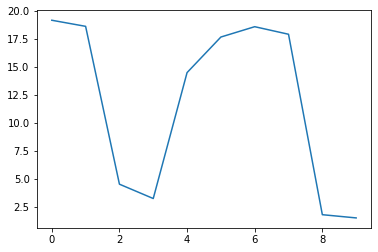

In [124]:
fit(10, model, loss, opt)

Epoch [10/1000], Loss: 7.6211
Epoch [20/1000], Loss: 8.4223
Epoch [30/1000], Loss: 21.5556
Epoch [40/1000], Loss: 18.1292
Epoch [50/1000], Loss: 4.2279
Epoch [60/1000], Loss: 2.1237
Epoch [70/1000], Loss: 4.2057
Epoch [80/1000], Loss: 7.5732
Epoch [90/1000], Loss: 4.2499
Epoch [100/1000], Loss: 0.8048
Epoch [110/1000], Loss: 9.2286
Epoch [120/1000], Loss: 5.4272
Epoch [130/1000], Loss: 24.2897
Epoch [140/1000], Loss: 3.2379
Epoch [150/1000], Loss: 28.1303
Epoch [160/1000], Loss: 1.9376
Epoch [170/1000], Loss: 4.5477
Epoch [180/1000], Loss: 5.1949
Epoch [190/1000], Loss: 3.8527
Epoch [200/1000], Loss: 5.1386
Epoch [210/1000], Loss: 7.1276
Epoch [220/1000], Loss: 3.2346
Epoch [230/1000], Loss: 12.8778
Epoch [240/1000], Loss: 22.2744
Epoch [250/1000], Loss: 11.0055
Epoch [260/1000], Loss: 13.8541
Epoch [270/1000], Loss: 4.5327
Epoch [280/1000], Loss: 14.2405
Epoch [290/1000], Loss: 2.0976
Epoch [300/1000], Loss: 18.8776
Epoch [310/1000], Loss: 8.2878
Epoch [320/1000], Loss: 13.9521
Epoch 

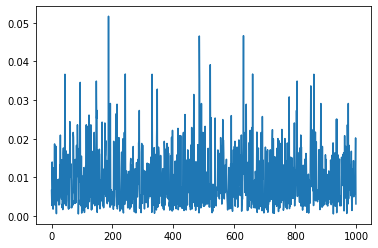

In [118]:
loss_values=fit(1000, model, loss, opt)

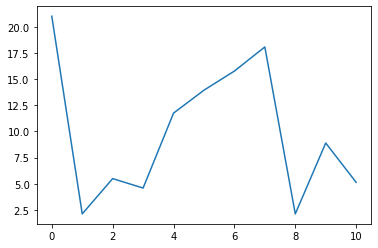

In [132]:
plt.plot(loss_values[-12:-1])

In [82]:
preds = model(x)
preds

tensor([[-0.5918, -4.0505,  3.9189],
        [-0.7931, -4.3637,  3.9639],
        [ 0.3341,  5.9061,  5.0048],
        ...,
        [ 0.1383, -0.3504, -4.4172],
        [ 0.7877, -4.7255, -7.5119],
        [ 1.4330,  1.9841, -2.2065]], grad_fn=<AddBackward0>)

nestrov accelerated gd

In [85]:
# Define model
model = nn.Linear(3, 8)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4731, -0.0035, -0.1499],
        [-0.2966,  0.5394,  0.1777],
        [-0.5346,  0.5248, -0.4425],
        [-0.5644, -0.4041, -0.0044],
        [ 0.1643, -0.0958, -0.0164],
        [ 0.0743,  0.4385,  0.0891],
        [-0.5688,  0.0173, -0.5292],
        [ 0.4345, -0.2274,  0.2207]], requires_grad=True)
Parameter containing:
tensor([0.4376, 0.2352, 0.3586, 0.4164, 0.5027, 0.4836, 0.4050, 0.4935],
       requires_grad=True)


In [86]:
opt_na = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, nesterov=True)

In [87]:
def model(X):
    return X.float() @ w_t.t() + b_t

In [88]:
def mse_loss(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference)/ difference.numel()

Epoch [10/1000], Loss: 1.7155
Epoch [20/1000], Loss: 18.5458
Epoch [30/1000], Loss: 9.2286
Epoch [40/1000], Loss: 8.7423
Epoch [50/1000], Loss: 4.2279
Epoch [60/1000], Loss: 5.5239
Epoch [70/1000], Loss: 23.9495
Epoch [80/1000], Loss: 13.8969
Epoch [90/1000], Loss: 1.9376
Epoch [100/1000], Loss: 5.4910
Epoch [110/1000], Loss: 7.6653
Epoch [120/1000], Loss: 9.4444
Epoch [130/1000], Loss: 23.5900
Epoch [140/1000], Loss: 12.1445
Epoch [150/1000], Loss: 14.5577
Epoch [160/1000], Loss: 5.0894
Epoch [170/1000], Loss: 6.1240
Epoch [180/1000], Loss: 9.3662
Epoch [190/1000], Loss: 9.4444
Epoch [200/1000], Loss: 5.6352
Epoch [210/1000], Loss: 9.7145
Epoch [220/1000], Loss: 4.5816
Epoch [230/1000], Loss: 0.8981
Epoch [240/1000], Loss: 0.9698
Epoch [250/1000], Loss: 10.3794
Epoch [260/1000], Loss: 24.2815
Epoch [270/1000], Loss: 2.8597
Epoch [280/1000], Loss: 7.6707
Epoch [290/1000], Loss: 1.9218
Epoch [300/1000], Loss: 6.5967
Epoch [310/1000], Loss: 23.9692
Epoch [320/1000], Loss: 5.9137
Epoch [3

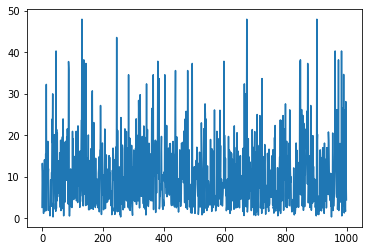

In [133]:
loss_values_nes=fit(1000, model, loss, opt_na)

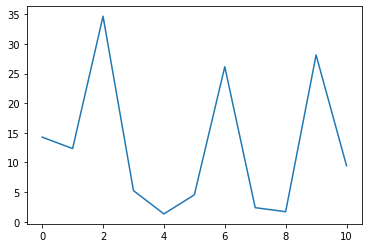

In [134]:
plt.plot(loss_values_nes[-12:-1])

nestrov from scratch

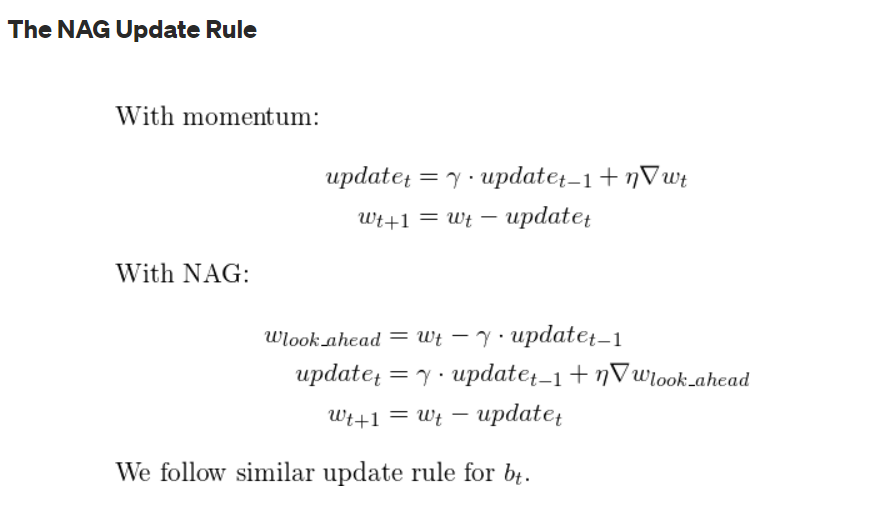

In [91]:
def compute_gradients_nestrov(x,y,y_hat,b_0, theta_o,lr, gama,vt,vtt):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    
    vt = gama * vt + lr * db   #vt =  update
    b_1 = b_0 - vt

    theta_lah = theta_o - gama*vtt
    #vt = np.zeros(theta_o.shape[0])
    vtt = gama * vtt + lr * dw
    theta_1 = theta_o - vtt
    return b_1,theta_1

In [92]:
b,theta=initialize(x_train.shape[1])

In [93]:
Y_hat=predict_Y(b,theta,x_train)

In [94]:
def run_gradient_descent_nestrov(X,Y,alpha, num_iterations, gama):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    vt = np.zeros(1)
    vtt = np.zeros(8)
    for each_iter in range(num_iterations):
      Y_hat=predict_Y(b,theta,X)   #predict
      this_cost=get_cost(Y,Y_hat)   #mse _loss  
      prev_b=b
      prev_theta=theta
      #b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)   #update w and b
      b, theta = compute_gradients_nestrov(X,Y,Y_hat,prev_b,prev_theta,alpha, gama,vt,vtt)
      if(iter_num%10==0):
        gd_iterations_df.loc[result_idx]=[iter_num,this_cost]    #adding each cost with iteration in a dataframe
        result_idx=result_idx+1
      iter_num +=1
      print('Final Estimate of b and theta : ',b,theta)
    return gd_iterations_df,b,theta,this_cost
gd_iterations_df,b,theta, mse_loss= run_gradient_descent_nestrov(x_train,y_train,alpha=0.0001,num_iterations=110,gama = 0.9)

Final Estimate of b and theta :  [0.65213135] [-2.13029526  0.69637727 -0.10062373  0.96873308  1.84170614 -1.12702751
  0.56101852  0.03319814]
Final Estimate of b and theta :  [0.65199195] [-2.12978971  0.69609955 -0.10085965  0.96867957  1.84150888 -1.12670334
  0.56080497  0.03332323]
Final Estimate of b and theta :  [0.65185257] [-2.12928429  0.6958219  -0.10109548  0.96862603  1.84131169 -1.12637926
  0.56059149  0.03344826]
Final Estimate of b and theta :  [0.65171323] [-2.128779    0.69554432 -0.10133122  0.96857246  1.84111458 -1.12605527
  0.56037808  0.03357324]
Final Estimate of b and theta :  [0.65157391] [-2.12827385  0.69526682 -0.10156687  0.96851886  1.84091753 -1.12573136
  0.56016474  0.03369817]
Final Estimate of b and theta :  [0.65143463] [-2.12776882  0.69498939 -0.10180242  0.96846524  1.84072056 -1.12540753
  0.55995146  0.03382304]
Final Estimate of b and theta :  [0.65129538] [-2.12726392  0.69471203 -0.10203788  0.96841158  1.84052367 -1.12508379
  0.5597382

In [95]:
gd_iterations_df

,iteration,cost
0,0.0,12.505702
1,10.0,12.444241
2,20.0,12.383127
3,30.0,12.322358
4,40.0,12.261932
5,50.0,12.201847
6,60.0,12.142100
7,70.0,12.082690
8,80.0,12.023614
9,90.0,11.964871


Text(0, 0.5, 'Cost or MSE')

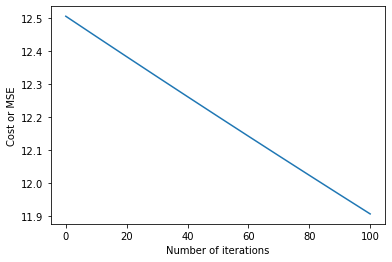

In [96]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

Streaming output truncated to the last 5000 lines.
Final Estimate of b and theta :  [0.14258934] [-0.13285433 -0.31788472 -0.51266873 -0.33772547  0.1094114  -0.36286126
 -0.20574855 -0.11288245]
Final Estimate of b and theta :  [0.1425626] [-0.13281496 -0.31785981 -0.51265003 -0.3377471   0.10944688 -0.36285988
 -0.20580188 -0.11279661]
Final Estimate of b and theta :  [0.14253586] [-0.13277559 -0.3178349  -0.51263134 -0.33776873  0.10948236 -0.36285851
 -0.2058552  -0.11271079]
Final Estimate of b and theta :  [0.14250913] [-0.13273623 -0.31780999 -0.51261263 -0.33779036  0.10951782 -0.36285713
 -0.20590851 -0.11262498]
Final Estimate of b and theta :  [0.14248241] [-0.13269688 -0.31778509 -0.51259393 -0.337812    0.10955329 -0.36285575
 -0.2059618  -0.1125392 ]
Final Estimate of b and theta :  [0.14245568] [-0.13265754 -0.31776019 -0.51257523 -0.33783363  0.10958874 -0.36285437
 -0.20601508 -0.11245342]
Final Estimate of b and theta :  [0.14242897] [-0.13261821 -0.31773529 -0.512556

Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

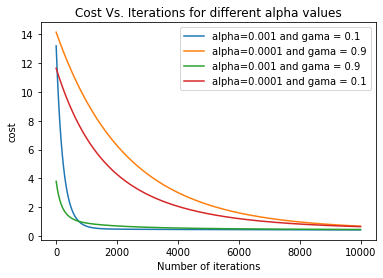

In [97]:
alpha_dfm_1,b,theta, mse_loss1=run_gradient_descent_nestrov(x_train,y_train,alpha=0.001,num_iterations=10000, gama = 0.1)
alpha_dfm_2,b,theta, mse_loss2=run_gradient_descent_nestrov(x_train,y_train,alpha=0.0001,num_iterations=10000, gama= 0.9)
alpha_dfm_3,b,theta, mse_loss1=run_gradient_descent_nestrov(x_train,y_train,alpha=0.001,num_iterations=10000, gama = 0.9)
alpha_dfm_4,b,theta, mse_loss2=run_gradient_descent_nestrov(x_train,y_train,alpha=0.0001,num_iterations=10000, gama= 0.1)
plt.plot(alpha_dfm_1['iteration'],alpha_dfm_1['cost'],label='alpha=0.001 and gama = 0.1')
plt.plot(alpha_dfm_2['iteration'],alpha_dfm_2['cost'],label='alpha=0.0001 and gama = 0.9')
plt.plot(alpha_dfm_3['iteration'],alpha_dfm_3['cost'],label='alpha=0.001 and gama = 0.9')
plt.plot(alpha_dfm_4['iteration'],alpha_dfm_4['cost'],label='alpha=0.0001 and gama = 0.1')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')